In [3]:
import numpy as np
import pandas as pd
import os
import cv2

In [35]:
image_path = '../Produced Images/Eye Masked/1709617490220.jpg'

In [36]:
image = cv2.imread(image_path)

In [8]:
(image>0).sum()

11940

In [14]:
image.shape

(1024, 1024, 3)

In [13]:
type(image)

numpy.ndarray

In [15]:
image_array = np.array(image)

In [16]:
image_array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [18]:
if image is None:
    print("Error: Image not found!")
else:
    # Get image dimensions
    height, width, channels = image.shape
    print(f"Image Dimensions: {height}x{width}, Channels: {channels}")

    # Iterate through each pixel
    for i in range(height):
        for j in range(width):
            if(image[i,j][0]>0):
                print(f"Pixel[{i},{j}]: {image[i, j]}")
        
        # Add a line break after each row
        print("-" * 50)

Image Dimensions: 1024x1024, Channels: 3
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-----------------------------------------

In [20]:

b,g,r = cv2.split(image)
meanb, meang, meanr = 0, 0, 0


In [23]:
i = 0
for value in b.flatten():
    if value>0:
        meanb = meanb+value
        i = i+1
mean_b = meanb/i
mean_b

60.59248322147651

In [24]:
i=0
for value in g.flatten():
    if value >0:
        meang = meang+value
        i=i+1
mean_g = meang/i
mean_g

63.215160197968224

In [25]:
i=0
for value in r.flatten():
    if value>0:
        meanr = meanr+value
        i = i+1
mean_r = meanr/i
mean_r

131.70658135283364

In [27]:
sum_r_minus_g = 0
count = 0
r, g = r.astype(np.int32), g.astype(np.int32)
# Flatten R and G channels and iterate over pixels
for red, green in zip(r.flatten(), g.flatten()):
    if red > 0 or green > 0:  # Ignore completely black pixels
        sum_r_minus_g += (red - green)
        count += 1

mean_r_minus_g = sum_r_minus_g / count if count > 0 else 0
print("Mean(R - G):", mean_r_minus_g)

Mean(R - G): 63.994054468738014


In [30]:
b,g,r = cv2.split(image)
r, g = r.astype(np.int32), g.astype(np.int32)

# Create mask for non-black pixels
mask = (r > 0) | (g > 0)

# Compute Mean(R - G) only for valid pixels
mean_r_minus_g = np.mean((r - g)[mask]) if np.any(mask) else 0

print("Mean(R - G):", mean_r_minus_g)

Mean(R - G): 63.994054468738014


In [31]:
b, g, r = cv2.split(image)
r, g = r.astype(np.int32), g.astype(np.int32)

# Create a mask to ignore completely black pixels (where R and G are both 0)
mask = (r > 0) | (g > 0)

# Compute EI only for valid pixels
ei_values = np.zeros_like(r, dtype=np.float32)  # Initialize EI array

# Avoid division by zero
valid_pixels = (r + g) > 0  
ei_values[valid_pixels] = 100 * ((r - g)[valid_pixels] / (r + g)[valid_pixels])

# Compute the mean EI for the entire image (excluding black pixels)
mean_ei = np.mean(ei_values[mask]) if np.any(mask) else 0

print("Mean Erythema Index:", mean_ei)

Mean Erythema Index: 32.171524


In [41]:
# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split channels
h, s, v = cv2.split(hsv)

# Convert to int32 to prevent overflow
h, s, v = h.astype(np.int32), s.astype(np.int32), v.astype(np.int32)

# Create a mask to ignore black pixels (where V == 0)
mask = v > 0

# Compute mean and standard deviation for each channel
mean_h = np.mean(h[mask]) if np.any(mask) else 0
mean_s = np.mean(s[mask]) if np.any(mask) else 0
mean_v = np.mean(v[mask]) if np.any(mask) else 0

print(f"Mean Hue: {mean_h:.2f}, Mean Saturation: {mean_s:.2f}, Mean Value: {mean_v:.2f}")

Mean Hue: 29.37, Mean Saturation: 200.68, Mean Value: 103.90


In [42]:
# Define hue threshold (adjustable, commonly 100+)
H_thresh = 100  

# Create a mask to exclude black pixels (V == 0)
valid_pixels_mask = v > 0  

# Mask high hue pixels (H > H_thresh) and count them
high_hue_mask = (h > H_thresh) & valid_pixels_mask  

# Compute High Hue Ratio (HHR)
high_hue_count = np.count_nonzero(high_hue_mask)
valid_pixel_count = np.count_nonzero(valid_pixels_mask)

HHR = (high_hue_count / valid_pixel_count) if valid_pixel_count > 0 else 0

print(f"High Hue Ratio (HHR): {HHR:.4f}")

High Hue Ratio (HHR): 0.1490


In [43]:
# Convert to grayscale using OpenCV
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a mask to ignore completely black pixels (where gray == 0)
valid_pixels_mask = gray > 0  

# Compute mean brightness, excluding black pixels
mean_brightness = np.mean(gray[valid_pixels_mask]) if np.any(valid_pixels_mask) else 0

print(f"Brightness (B): {mean_brightness:.2f}")

Brightness (B): 70.70


In [45]:
from scipy.stats import entropy

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Compute histogram (256 bins for intensity levels 0-255)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalize histogram to get probability distribution
hist_norm = hist.ravel() / hist.sum()  # Convert to 1D array and normalize

# Compute entropy
image_entropy = entropy(hist_norm, base=2)

print(f"Entropy (Ent): {image_entropy:.4f}")

Entropy (Ent): 0.0474


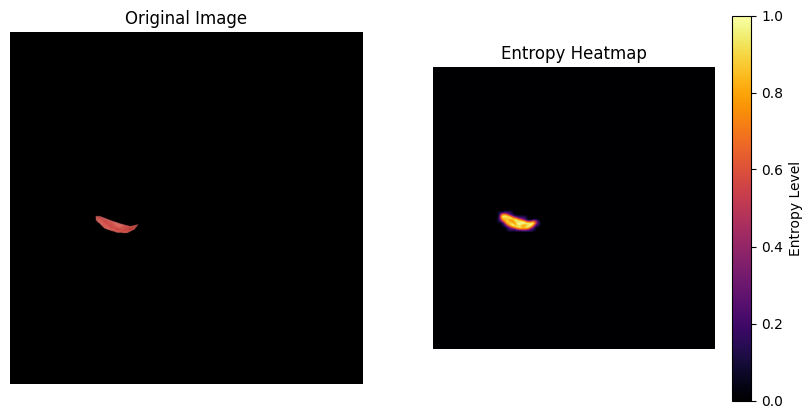

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Load the image and convert to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute local entropy using a 9x9 window (adjustable for sensitivity)
entropy_img = entropy(gray, disk(9))

# Normalize entropy values for better visualization
entropy_norm = (entropy_img - entropy_img.min()) / (entropy_img.max() - entropy_img.min())

# Display the entropy heatmap
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Entropy Heatmap
plt.subplot(1, 2, 2)
plt.imshow(entropy_norm, cmap="inferno")  # "inferno" highlights high entropy regions
plt.colorbar(label="Entropy Level")
plt.title("Entropy Heatmap")
plt.axis("off")

plt.show()


In [48]:
import cv2
import numpy as np
from scipy.ndimage import uniform_filter, generic_filter

# Load the image and convert to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define window size (9x9 for local region analysis)
window_size = 9
half_window = window_size // 2

# G1: Difference between pixel intensity and min intensity in window
G1 = image - cv2.erode(image, np.ones((window_size, window_size), np.uint8))

# G2: Difference between max intensity in window and pixel intensity
G2 = cv2.dilate(image, np.ones((window_size, window_size), np.uint8)) - image

# G3: Difference between pixel intensity and mean intensity in window
mean_window = uniform_filter(image.astype(np.float32), size=window_size)
G3 = image.astype(np.float32) - mean_window

# G4: Standard deviation in the window
def local_std(img):
    mean_sq = uniform_filter(img.astype(np.float32) ** 2, size=window_size)
    return np.sqrt(mean_sq - mean_window**2)

G4 = local_std(image)

# G5: Center pixel intensity (unchanged)
G5 = image.copy()

# Compute mean values across the entire ROI
mean_G1 = np.mean(G1)
mean_G2 = np.mean(G2)
mean_G3 = np.mean(G3)
mean_G4 = np.mean(G4)
mean_G5 = np.mean(G5)

print(f"Mean G1: {mean_G1:.2f}")
print(f"Mean G2: {mean_G2:.2f}")
print(f"Mean G3: {mean_G3:.2f}")
print(f"Mean G4: {mean_G4:.2f}")
print(f"Mean G5: {mean_G5:.2f}")


Mean G1: 0.17
Mean G2: 0.22
Mean G3: 0.00
Mean G4: 0.13
Mean G5: 0.32


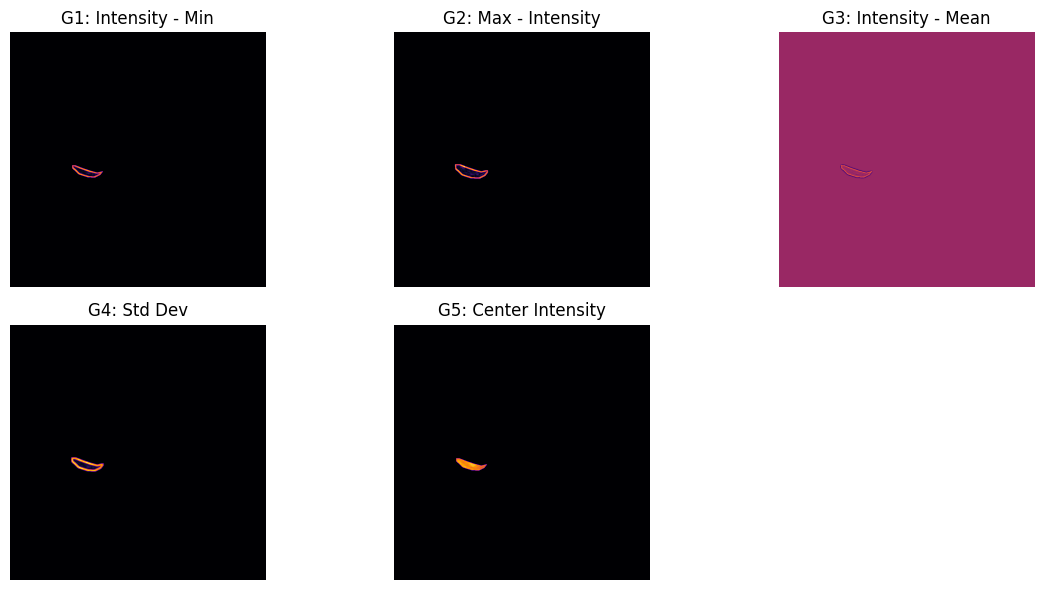

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

# Load the image and convert to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define window size (9x9 for local analysis)
window_size = 9
half_window = window_size // 2

# G1: Difference between pixel intensity and min intensity in window
G1 = image - cv2.erode(image, np.ones((window_size, window_size), np.uint8))

# G2: Difference between max intensity in window and pixel intensity
G2 = cv2.dilate(image, np.ones((window_size, window_size), np.uint8)) - image

# G3: Difference between pixel intensity and mean intensity in window
mean_window = uniform_filter(image.astype(np.float32), size=window_size)
G3 = image.astype(np.float32) - mean_window

# G4: Standard deviation in the window
def local_std(img):
    mean_sq = uniform_filter(img.astype(np.float32) ** 2, size=window_size)
    return np.sqrt(mean_sq - mean_window**2)

G4 = local_std(image)

# G5: Center pixel intensity (original grayscale image)
G5 = image.copy()

# Normalize feature maps for better visualization (scale 0-1)
def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)  # Avoid division by zero

G1_norm = normalize(G1)
G2_norm = normalize(G2)
G3_norm = normalize(G3)
G4_norm = normalize(G4)
G5_norm = normalize(G5)

# Plot heatmaps
plt.figure(figsize=(12, 6))

feature_maps = [G1_norm, G2_norm, G3_norm, G4_norm, G5_norm]
titles = ["G1: Intensity - Min", "G2: Max - Intensity", "G3: Intensity - Mean",
          "G4: Std Dev", "G5: Center Intensity"]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_maps[i], cmap="inferno")  # "inferno" highlights details well
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Mean G1: 53.67
Mean G2: 27.37
Mean G3: 7.85
Mean G4: 26.35
Mean G5: 102.57


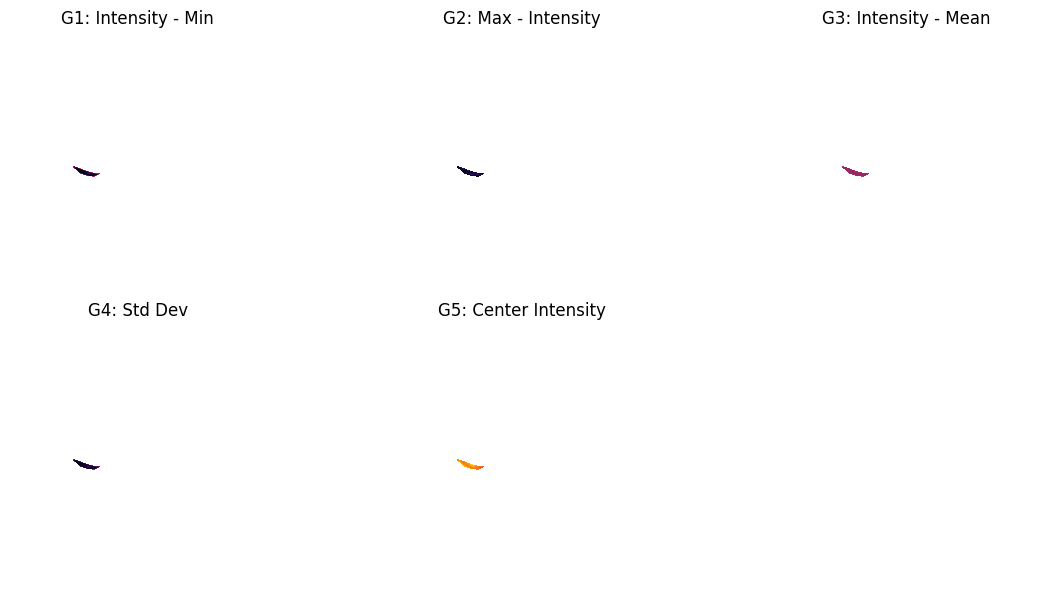

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

# Load the image and convert to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create mask: Ignore completely black pixels (intensity == 0)
mask = image > 0  # True for non-black pixels, False for black

# Define window size for local analysis
window_size = 9

# Convert image to float before processing to prevent integer NaN errors
image_float = image.astype(np.float32)

# G1: Difference between pixel intensity and min intensity in window
G1 = image_float - cv2.erode(image_float, np.ones((window_size, window_size), np.uint8))

# G2: Difference between max intensity in window and pixel intensity
G2 = cv2.dilate(image_float, np.ones((window_size, window_size), np.uint8)) - image_float

# G3: Difference between pixel intensity and mean intensity in window
mean_window = uniform_filter(image_float, size=window_size)
G3 = image_float - mean_window

# G4: Standard deviation in the window
def local_std(img):
    mean_sq = uniform_filter(img ** 2, size=window_size)
    return np.sqrt(mean_sq - mean_window**2)

G4 = local_std(image_float)

# G5: Center pixel intensity (original grayscale image)
G5 = image_float.copy()

# Apply mask: Set black pixels to NaN to exclude from analysis
G1[~mask] = np.nan
G2[~mask] = np.nan
G3[~mask] = np.nan
G4[~mask] = np.nan
G5[~mask] = np.nan

# Compute mean values **only for valid pixels (non-black)**
mean_G1 = np.nanmean(G1)
mean_G2 = np.nanmean(G2)
mean_G3 = np.nanmean(G3)
mean_G4 = np.nanmean(G4)
mean_G5 = np.nanmean(G5)

print(f"Mean G1: {mean_G1:.2f}")
print(f"Mean G2: {mean_G2:.2f}")
print(f"Mean G3: {mean_G3:.2f}")
print(f"Mean G4: {mean_G4:.2f}")
print(f"Mean G5: {mean_G5:.2f}")

# Normalize for visualization
def normalize(img):
    return (img - np.nanmin(img)) / (np.nanmax(img) - np.nanmin(img) + 1e-8)  # Avoid division by zero

G1_norm = normalize(G1)
G2_norm = normalize(G2)
G3_norm = normalize(G3)
G4_norm = normalize(G4)
G5_norm = normalize(G5)

# Plot heatmaps
plt.figure(figsize=(12, 6))

feature_maps = [G1_norm, G2_norm, G3_norm, G4_norm, G5_norm]
titles = ["G1: Intensity - Min", "G2: Max - Intensity", "G3: Intensity - Mean",
          "G4: Std Dev", "G5: Center Intensity"]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_maps[i], cmap="inferno")  # "inferno" highlights vessel-like structures
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [53]:
# Load the image
image = cv2.imread(image_path)

# Convert BGR to LAB
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB channels
L, A, B = cv2.split(lab)

# Convert to float32 for better precision
L, A, B = L.astype(np.float32), A.astype(np.float32), B.astype(np.float32)

# Create a mask to exclude black pixels (where L == 0)
mask = L > 0

# Compute mean values only for valid (non-black) pixels
mean_L = np.mean(L[mask]) if np.any(mask) else 0
mean_A = np.mean(A[mask]) if np.any(mask) else 0
mean_B = np.mean(B[mask]) if np.any(mask) else 0

# Print results
print(f"Mean L: {mean_L:.2f}, Mean A: {mean_A:.2f}, Mean B: {mean_B:.2f}")

Mean L: 85.34, Mean A: 157.58, Mean B: 145.75


In [ ]:
def extract_rgb_features(image_path):
    """Computes RGB color statistics for a given image."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert to float32 for precision
    image = image.astype(np.float32)

    # Split into RGB channels
    B, G, R = cv2.split(image)

    # Create a mask to ignore black pixels (where all channels are 0)
    maskR = (R > 0)
    maskG = (G > 0)
    maskB = (B > 0)

    # Compute mean and standard deviation for each channel
    mean_R = np.mean(R[maskR]) if np.any(maskR) else 0
    mean_G = np.mean(G[maskG]) if np.any(maskG) else 0
    mean_B = np.mean(B[maskB]) if np.any(maskB) else 0

    # Compute Mean (R - G) ignoring black pixels
    maskR_G = (R>0) | (G>0)
    mean_R_G = np.mean((R - G)[maskR_G]) if np.any(maskR_G) else 0

    return {
        "Mean_R": mean_R,
        "Mean_G": mean_G,
        "Mean_B": mean_B,
        "Mean_R_G": mean_R_G
    }

# Example usage
rgb_features = extract_rgb_features(image_path)
print(rgb_features)


{'Mean_R': 131.70659, 'Mean_G': 63.21516, 'Mean_B': 60.592484, 'Mean_R_G': 63.994053}


In [56]:
def extract_erythema_index(image_path):
    """Computes the Erythema Index (EI) for a given image."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert to int32 for safe subtraction
    b, g, r = cv2.split(image)
    r, g = r.astype(np.int32), g.astype(np.int32)

    # Create a mask to ignore completely black pixels (where R and G are both 0)
    mask = (r > 0) | (g > 0)

    # Initialize EI array with zeros
    ei_values = np.zeros_like(r, dtype=np.float32)

    # Avoid division by zero
    valid_pixels = (r + g) > 0  
    ei_values[valid_pixels] = 100 * ((r - g)[valid_pixels] / (r + g)[valid_pixels])

    # Compute the mean EI for the entire image (excluding black pixels)
    mean_ei = np.mean(ei_values[mask]) if np.any(mask) else 0

    return {"Erythema_Index": mean_ei}

# Example usage
# image_path = "your_image.jpg"
ei_features = extract_erythema_index(image_path)
print(ei_features)


{'Erythema_Index': 32.171524}


In [57]:
def extract_hsv_features(image_path):
    """Computes mean Hue, Saturation, and Value (HSV) features for a given image."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split channels
    h, s, v = cv2.split(hsv)

    # Convert to int32 to prevent overflow issues
    h, s, v = h.astype(np.int32), s.astype(np.int32), v.astype(np.int32)

    # Create a mask to ignore black pixels (where V == 0)
    mask = v > 0

    # Compute mean values only for valid (non-black) pixels
    mean_h = np.mean(h[mask]) if np.any(mask) else 0
    mean_s = np.mean(s[mask]) if np.any(mask) else 0
    mean_v = np.mean(v[mask]) if np.any(mask) else 0

    return {
        "Mean_Hue": mean_h,
        "Mean_Saturation": mean_s,
        "Mean_Value": mean_v
    }

# Example usage
hsv_features = extract_hsv_features(image_path)
print(hsv_features)


{'Mean_Hue': 29.367372577171572, 'Mean_Saturation': 200.67910983488872, 'Mean_Value': 103.90326633165829}


In [58]:
def extract_hhr(image_path, H_thresh=100):
    """Computes High Hue Ratio (HHR) for a given image based on a hue threshold."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split channels
    h, s, v = cv2.split(hsv)

    # Convert to int32 to prevent overflow issues
    h, v = h.astype(np.int32), v.astype(np.int32)

    # Create a mask to exclude black pixels (V == 0)
    valid_pixels_mask = v > 0  

    # Mask high hue pixels (H > H_thresh)
    high_hue_mask = (h > H_thresh) & valid_pixels_mask  

    # Compute High Hue Ratio (HHR)
    high_hue_count = np.count_nonzero(high_hue_mask)
    valid_pixel_count = np.count_nonzero(valid_pixels_mask)

    HHR = (high_hue_count / valid_pixel_count) if valid_pixel_count > 0 else 0

    return {"High_Hue_Ratio": HHR}


hhr_features = extract_hhr(image_path)
print(hhr_features)


{'High_Hue_Ratio': 0.14895908111988515}


In [59]:
def extract_brightness(image_path):
    """Computes the mean brightness (B) of a given image, excluding black pixels."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale using OpenCV
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a mask to ignore completely black pixels (where gray == 0)
    valid_pixels_mask = gray > 0  

    # Compute mean brightness, excluding black pixels
    mean_brightness = np.mean(gray[valid_pixels_mask]) if np.any(valid_pixels_mask) else 0

    return {"Brightness": mean_brightness}


brightness_features = extract_brightness(image_path)
print(brightness_features)


{'Brightness': 70.70411129568106}


In [61]:
from scipy.stats import entropy

def extract_entropy(image_path):
    """Computes the entropy (Ent) of a given image using pixel intensity distribution."""
    
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Compute histogram (256 bins for intensity levels 0-255)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalize histogram to get probability distribution
    hist_norm = hist.ravel() / hist.sum()  # Convert to 1D array and normalize

    # Compute entropy
    image_entropy = entropy(hist_norm, base=2)

    return {"Entropy": image_entropy}

entropy_features = extract_entropy(image_path)
print(entropy_features)


{'Entropy': 0.04740133843029693}


In [62]:
from scipy.ndimage import uniform_filter

def extract_gray_level_features(image_path, window_size=9):
    """Computes gray-level features (G1-G5) for a given image using local window analysis."""
    
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create mask: Ignore completely black pixels (intensity == 0)
    mask = image > 0  # True for non-black pixels, False for black

    # Convert image to float32 before processing to prevent integer NaN errors
    image_float = image.astype(np.float32)

    # G1: Difference between pixel intensity and min intensity in window
    G1 = image_float - cv2.erode(image_float, np.ones((window_size, window_size), np.uint8))

    # G2: Difference between max intensity in window and pixel intensity
    G2 = cv2.dilate(image_float, np.ones((window_size, window_size), np.uint8)) - image_float

    # G3: Difference between pixel intensity and mean intensity in window
    mean_window = uniform_filter(image_float, size=window_size)
    G3 = image_float - mean_window

    # G4: Standard deviation in the window
    def local_std(img):
        mean_sq = uniform_filter(img ** 2, size=window_size)
        return np.sqrt(mean_sq - mean_window**2)

    G4 = local_std(image_float)

    # G5: Center pixel intensity (original grayscale image)
    G5 = image_float.copy()

    # Apply mask: Set black pixels to NaN to exclude from analysis
    G1[~mask] = np.nan
    G2[~mask] = np.nan
    G3[~mask] = np.nan
    G4[~mask] = np.nan
    G5[~mask] = np.nan

    # Compute mean values **only for valid pixels (non-black)**
    mean_G1 = np.nanmean(G1)
    mean_G2 = np.nanmean(G2)
    mean_G3 = np.nanmean(G3)
    mean_G4 = np.nanmean(G4)
    mean_G5 = np.nanmean(G5)

    return {
        "Mean_G1": mean_G1,
        "Mean_G2": mean_G2,
        "Mean_G3": mean_G3,
        "Mean_G4": mean_G4,
        "Mean_G5": mean_G5
    }

gray_level_features = extract_gray_level_features(image_path)
print(gray_level_features)


{'Mean_G1': 53.67408, 'Mean_G2': 27.372524, 'Mean_G3': 7.8484035, 'Mean_G4': 26.354454, 'Mean_G5': 102.57021}


In [78]:
def extract_lab_features(image_path):
    """Computes mean L (Lightness), A (Green-Red), and B (Blue-Yellow) features for a given image."""
    
    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to LAB
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB channels
    L, A, B = cv2.split(lab)

    # Convert to float32 for better precision
    L, A, B = L.astype(np.float32), A.astype(np.float32), B.astype(np.float32)

    # Create a mask to exclude black pixels (where L == 0)
    mask = L > 0

    # Compute mean values only for valid (non-black) pixels
    mean_L = np.mean(L[mask]) if np.any(mask) else 0
    mean_A = np.mean(A[mask]) if np.any(mask) else 0
    mean_B = np.mean(B[mask]) if np.any(mask) else 0

    return {
        "Mean_L": mean_L,
        "Mean_A": mean_A,
        "Mean_Br": mean_B
    }

lab_features = extract_lab_features(image_path)
print(lab_features)


{'Mean_L': 85.33922, 'Mean_A': 157.5762, 'Mean_Br': 145.74857}


In [79]:
image_folder = "./folder"

In [80]:
data = []
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

for image_name in image_files:
    image = os.path.join(image_folder, image_name)
   

    # Extract features
    features = {"Image_Name": image_name}
    features.update(extract_rgb_features(image))
    features.update(extract_erythema_index(image))
    features.update(extract_hsv_features(image))
    features.update(extract_hhr(image))
    features.update(extract_brightness(image))
    features.update(extract_entropy(image))
    features.update(extract_lab_features(image))
    features.update(extract_gray_level_features(image))

    # Append to data list
    data.append(features)

# Create DataFrame
df = pd.DataFrame(data)

In [81]:
df

,Image_Name,Mean_R,Mean_G,Mean_B,Mean_R_G,Erythema_Index,Mean_Hue,Mean_Saturation,Mean_Value,High_Hue_Ratio,Brightness,Entropy,Mean_L,Mean_A,Mean_Br,Mean_G1,Mean_G2,Mean_G3,Mean_G4,Mean_G5
0,1709617490220.jpg,131.706589,63.215160,60.592484,63.994053,32.171524,29.367373,200.679110,103.903266,0.148959,70.704111,0.047401,85.339218,157.576202,145.748566,53.674080,27.372524,7.848403,26.354454,102.570213
1,1709617782204.jpg,109.073776,57.617134,54.754238,52.570099,34.788120,27.234863,186.048978,93.004435,0.141149,63.238866,0.052394,74.141937,152.134354,141.959122,47.000000,25.432749,6.171990,22.339546,81.861877
2,1709618916134.jpg,107.769363,60.255825,66.457344,49.842838,34.098019,96.906580,197.103710,85.582453,0.532359,62.758943,0.031541,74.819908,152.460434,138.383453,66.334137,32.717117,10.256500,33.248707,92.807060
3,1709619661748.jpg,113.670876,53.096241,53.484196,56.653030,33.346024,33.246879,200.957511,89.278292,0.177205,60.908574,0.042513,74.068512,155.240585,142.901154,48.659107,25.505156,7.698782,24.404131,87.301033


In [82]:
df.shape

(4, 20)